In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#% matplotlib inline

import pylab 
import scipy.stats as stats

In [121]:
data = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")

In [122]:
data.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [123]:
c = pd.read_csv('Eniola_train.csv')
d = pd.read_csv('Eniola_test.csv')
data  = pd.merge(data,c ,on=['ID'],how='left')
test  = pd.merge(test,d ,on=['ID'],how='left')

In [124]:
#data.to_csv('fadtrain.csv',index = False)
#test.to_csv('fadtest.csv',index = False)
data.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification,district,region
0,5086,98,2,3,1,1,2,2,0,0,...,4,-4.460442,29.811396,0,0,0,0,0,Kasulu,Kigoma
1,1258,40,1,1,3,5,1,1,1,0,...,4,-6.176438,39.244871,1,1,1,0,3,Zanzibar,Zanzibar
2,331,18,2,4,6,3,2,1,0,0,...,1,-6.825702,37.652798,1,0,0,0,2,Morogoro Urban,Morogoro
3,6729,50,1,1,3,1,1,1,0,0,...,4,-3.372049,35.808307,1,0,1,0,3,Karatu,Arusha
4,8671,34,1,1,1,1,2,1,0,1,...,4,-7.179645,31.039095,1,1,0,1,3,Mpanda,Rukwa


In [125]:
a = pd.read_csv('lat2dat.csv')
b = pd.read_csv('lat2test.csv')

In [126]:
data.drop(['mobile_money', 'savings', 'borrowing', 'insurance'], axis = 1,inplace = True)

#distest = pd.read_csv("districttest.csv")
#distrain= pd.read_csv('districttrain.csv')
#trreg = pd.read_csv('trainregion.csv')
#testreg = pd.read_csv('testregion.csv')
#distrain.drop('region',axis =1 ,inplace = True)
#data = pd.concat([data,distrain,trreg,a], axis = 1)
#test = pd.concat([test,distest,testreg,b], axis = 1)

data = pd.concat([data,a], axis = 1)

test = pd.concat([test,b], axis = 1)



In [127]:
ntrain = data.shape[0]
ntest = test.shape[0]

all_data = pd.concat((data, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (9459, 37)


C:\Users\OLALEYE ENIOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [128]:
all_data.district.nunique()

121

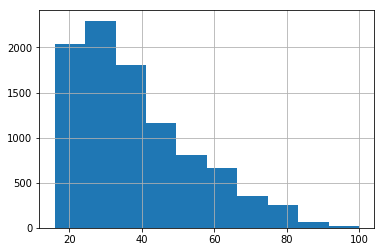

In [129]:
all_data.Q1.hist()

In [130]:
all_data.Q1.max()

100

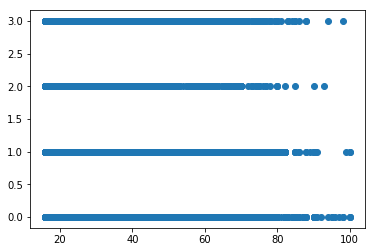

In [131]:
plt.scatter(x = all_data.Q1,y = all_data.mobile_money_classification)

C:\Users\OLALEYE ENIOLA\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\OLALEYE ENIOLA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


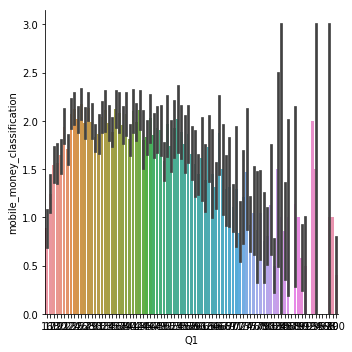

In [132]:
sns.factorplot(x='Q1',y='mobile_money_classification',data=all_data,kind='bar')

In [133]:
all_data.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,Q8_6,Q8_7,Q8_8,Q8_9,Q9,district,latitude2,longitude,mobile_money_classification,region
0,5086,-4.460442,29.811396,98,-1,-1,2,-1,2,-1,...,0,0,0,1,-1,Kasulu,-4.57268,30.11092,0.0,Kigoma
1,1258,-6.176438,39.244871,40,-1,-1,1,4,1,5,...,0,0,0,0,1,Zanzibar,-6.16875,39.20243,3.0,Zanzibar
2,331,-6.825702,37.652798,18,-1,-1,2,-1,2,-1,...,0,0,0,1,-1,Morogoro Urban,-6.82282,37.67290,2.0,Morogoro
3,6729,-3.372049,35.808307,50,-1,-1,1,2,2,-1,...,0,0,0,0,-1,Karatu,-3.33868,35.67410,3.0,Arusha
4,8671,-7.179645,31.039095,34,1,-1,2,-1,1,1,...,0,0,0,0,-1,Mpanda,-7.50237,31.03970,3.0,Rukwa


In [134]:
all_data.district.dtypes

dtype('O')

In [135]:
# let's check at the different number of labels within each variable
cols_to_use = ['district','region']

for col in cols_to_use:
    print('variable: ', col, ' number of labels: ', len(all_data[col].unique()))
    
print(' mobile total : ', len(all_data))

variable:  district  number of labels:  121
variable:  region  number of labels:  22
 mobile total :  9459


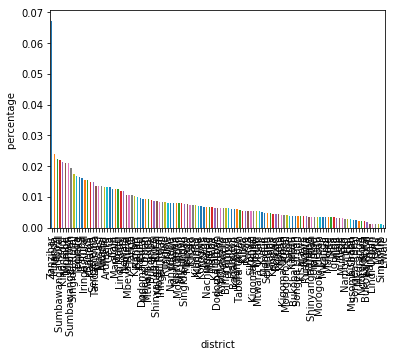

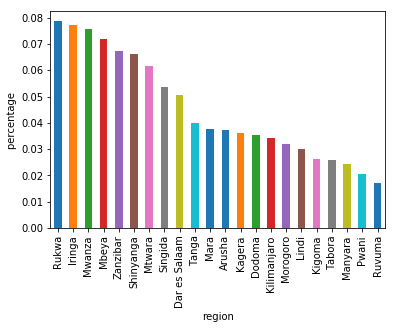

In [136]:
# let's plot how frequently appears each label 
# within a variable in the dataset

total = len(all_data)

for col in cols_to_use:
    # count the number of observations per label and divide by total 
    # number of cars
    temp_df = pd.Series(all_data[col].value_counts() / total)
    
    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    fig.set_ylabel('percentage ')
    plt.show()

In [137]:
all_data.district.value_counts()

Zanzibar            637
Mpanda              226
Mbozi               212
Sumbawanga Rural    207
Kinondoni           202
Njombe              200
Mufindi             200
Sumbawanga Urban    185
Singida Rural       164
Bunda               158
Temeke              155
Iramba              153
Iringa Rural        148
Bariadi             146
Kahama              142
Sengerema           139
Tandahimba          129
Masasi              128
Nkansi              127
Arusha              126
Arumeru             124
Geita               124
Ilala               120
Manyoni             118
Magu                118
Lindi Rural         113
Newala              112
Ilemela             102
Mbeya Rural         101
Tanga                99
                   ... 
Ngara                36
Ruangwa              36
Hanang               34
Shinyanga Urban      34
Urambo               34
Meatu                33
Morogoro Urban       33
Mwanga               33
Kilindi              33
Igunga               32
Siha            

In [138]:
temp_df = pd.Series(all_data['district'].value_counts() / total)
temp_df.sort_values(ascending=False)
temp_df

Zanzibar            0.067343
Mpanda              0.023893
Mbozi               0.022413
Sumbawanga Rural    0.021884
Kinondoni           0.021355
Njombe              0.021144
Mufindi             0.021144
Sumbawanga Urban    0.019558
Singida Rural       0.017338
Bunda               0.016704
Temeke              0.016387
Iramba              0.016175
Iringa Rural        0.015646
Bariadi             0.015435
Kahama              0.015012
Sengerema           0.014695
Tandahimba          0.013638
Masasi              0.013532
Nkansi              0.013426
Arusha              0.013321
Arumeru             0.013109
Geita               0.013109
Ilala               0.012686
Manyoni             0.012475
Magu                0.012475
Lindi Rural         0.011946
Newala              0.011841
Ilemela             0.010783
Mbeya Rural         0.010678
Tanga               0.010466
                      ...   
Ngara               0.003806
Ruangwa             0.003806
Hanang              0.003594
Shinyanga Urba

In [139]:
temp_df[temp_df >= 0.003277].index

Index(['Zanzibar', 'Mpanda', 'Mbozi', 'Sumbawanga Rural', 'Kinondoni',
       'Njombe', 'Mufindi', 'Sumbawanga Urban', 'Singida Rural', 'Bunda',
       ...
       'Shinyanga Urban', 'Urambo', 'Meatu', 'Morogoro Urban', 'Mwanga',
       'Kilindi', 'Igunga', 'Siha', 'Makete', 'Rufiji'],
      dtype='object', length=104)

In [140]:
# let's create a dictionary to replace the rare labels with the
# string 'rare'

grouping_dict = {
    k: ('rare' if k not in temp_df[temp_df >= 0.003277 ].index else k)
    for k in temp_df.index
}

grouping_dict

{'Zanzibar': 'Zanzibar',
 'Mpanda': 'Mpanda',
 'Mbozi': 'Mbozi',
 'Sumbawanga Rural': 'Sumbawanga Rural',
 'Kinondoni': 'Kinondoni',
 'Njombe': 'Njombe',
 'Mufindi': 'Mufindi',
 'Sumbawanga Urban': 'Sumbawanga Urban',
 'Singida Rural': 'Singida Rural',
 'Bunda': 'Bunda',
 'Temeke': 'Temeke',
 'Iramba': 'Iramba',
 'Iringa Rural': 'Iringa Rural',
 'Bariadi': 'Bariadi',
 'Kahama': 'Kahama',
 'Sengerema': 'Sengerema',
 'Tandahimba': 'Tandahimba',
 'Masasi': 'Masasi',
 'Nkansi': 'Nkansi',
 'Arusha': 'Arusha',
 'Arumeru': 'Arumeru',
 'Geita': 'Geita',
 'Ilala': 'Ilala',
 'Manyoni': 'Manyoni',
 'Magu': 'Magu',
 'Lindi Rural': 'Lindi Rural',
 'Newala': 'Newala',
 'Ilemela': 'Ilemela',
 'Mbeya Rural': 'Mbeya Rural',
 'Tanga': 'Tanga',
 'Kwimba': 'Kwimba',
 'Babati': 'Babati',
 'Kasulu': 'Kasulu',
 'Dodoma Rural': 'Dodoma Rural',
 'Mbeya Urban': 'Mbeya Urban',
 'Mtwara Rural': 'Mtwara Rural',
 'Bukombe': 'Bukombe',
 'Lushoto': 'Lushoto',
 'Shinyanga Rural': 'Shinyanga Rural',
 'Moshi Rural': 'Mo

In [141]:
all_data['dist_grouped'] = all_data['district'].map(grouping_dict)
all_data[['dist_grouped', 'district']].head(10)

,dist_grouped,district
0,Kasulu,Kasulu
1,Zanzibar,Zanzibar
2,Morogoro Urban,Morogoro Urban
3,Karatu,Karatu
4,Mpanda,Mpanda
5,Kilosa,Kilosa
6,Iringa Rural,Iringa Rural
7,Mbeya Urban,Mbeya Urban
8,Kahama,Kahama
9,Iringa Rural,Iringa Rural


In [142]:
all_data.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,Q8_7,Q8_8,Q8_9,Q9,district,latitude2,longitude,mobile_money_classification,region,dist_grouped
0,5086,-4.460442,29.811396,98,-1,-1,2,-1,2,-1,...,0,0,1,-1,Kasulu,-4.57268,30.11092,0.0,Kigoma,Kasulu
1,1258,-6.176438,39.244871,40,-1,-1,1,4,1,5,...,0,0,0,1,Zanzibar,-6.16875,39.20243,3.0,Zanzibar,Zanzibar
2,331,-6.825702,37.652798,18,-1,-1,2,-1,2,-1,...,0,0,1,-1,Morogoro Urban,-6.82282,37.67290,2.0,Morogoro,Morogoro Urban
3,6729,-3.372049,35.808307,50,-1,-1,1,2,2,-1,...,0,0,0,-1,Karatu,-3.33868,35.67410,3.0,Arusha,Karatu
4,8671,-7.179645,31.039095,34,1,-1,2,-1,1,1,...,0,0,0,-1,Mpanda,-7.50237,31.03970,3.0,Rukwa,Mpanda


In [143]:
all_data.drop('district', axis = 1,inplace = True)

In [144]:
cols_to_use = data.columns

In [145]:
# let's plot the histograms to have an impression of the distribution of the numerical variables
#for col in cols_to_use:
 #   fig = all_data[col].hist(bins=50)
  #  fig.set_xlabel(col)
   # fig.set_label('fin inclusion')
    #plt.show() ''''
    
    # plot the numerical columns vs the output SalePrice to visualise the (linear) relationship

#for col in cols_to_use[:-3]:
 #   data.plot.scatter(x=col, y='mobile_money_classification', ylim=(0,4))
  #  plt.show()

In [146]:
all_data = all_data.replace(-1,0)

In [147]:
all_data.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,Q8_6,Q8_7,Q8_8,Q8_9,Q9,latitude2,longitude,mobile_money_classification,region,dist_grouped
0,5086,-4.460442,29.811396,98,0,0,2,0,2,0,...,0,0,0,1,0,-4.57268,30.11092,0.0,Kigoma,Kasulu
1,1258,-6.176438,39.244871,40,0,0,1,4,1,5,...,0,0,0,0,1,-6.16875,39.20243,3.0,Zanzibar,Zanzibar
2,331,-6.825702,37.652798,18,0,0,2,0,2,0,...,0,0,0,1,0,-6.82282,37.67290,2.0,Morogoro,Morogoro Urban
3,6729,-3.372049,35.808307,50,0,0,1,2,2,0,...,0,0,0,0,0,-3.33868,35.67410,3.0,Arusha,Karatu
4,8671,-7.179645,31.039095,34,1,0,2,0,1,1,...,0,0,0,0,0,-7.50237,31.03970,3.0,Rukwa,Mpanda


In [148]:
data.Q16.unique()

array([1, 4, 5, 3, 2], dtype=int64)

In [149]:
#all_data['hm'] = all_data['Q1']/all_data['Q16']
all_data['hm'] = all_data['Q1']/all_data['Q16']


In [150]:
#all_data['tew'] = all_data.Longitude/all_data.Q16

In [151]:

#all_data['distance1'] = np.sqrt((data.latitude2 - data.Latitude) ** 2 + (data.longitude - data.Longitude) ** 2)
import math

In [152]:
#np.radians(data.Latitude)

In [153]:
from math import sin, cos, sqrt, atan2
def calculate_distance(Latitude, Longitude, latitude2, longitude):
    R = 6373.0

    Latitude = np.radians(Latitude)
    Longitude = np.radians(Longitude)
    latitude2 = np.radians(latitude2)
    longitude = np.radians(longitude)

    dlon = longitude - Longitude
    dlat = latitude2 - Latitude

    a = np.sin(dlat / 2)**2 + np.cos(Latitude) * np.cos(latitude2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

In [154]:
all_data['distance'] = calculate_distance(**all_data[['Latitude', 'Longitude', 'latitude2', 'longitude']])


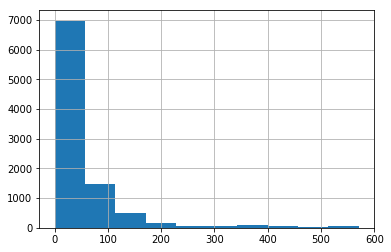

In [155]:
all_data.distance.hist()

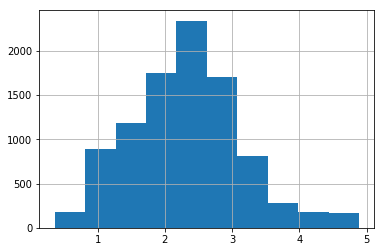

In [156]:
(all_data.distance**(1/4)).hist()

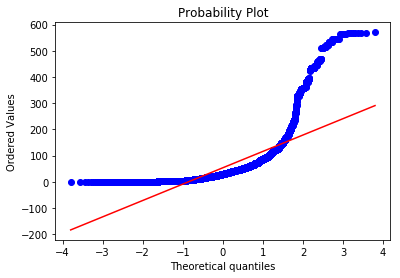

In [157]:
# and the Q-Q plot
stats.probplot(all_data.distance, dist="norm", plot=pylab)
pylab.show()

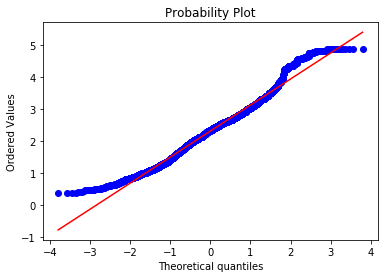

In [158]:
# and the Q-Q plot
stats.probplot((all_data.distance**(1/4)), dist="norm", plot=pylab)
pylab.show()

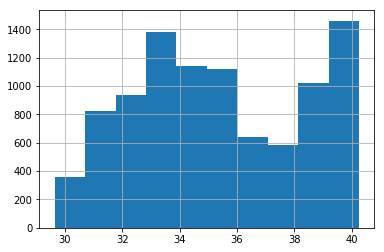

In [159]:
all_data.Longitude.hist()

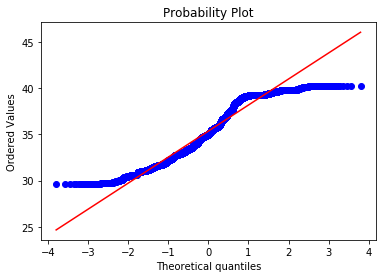

In [160]:
# and the Q-Q plot
stats.probplot(all_data.Longitude, dist="norm", plot=pylab)
pylab.show()

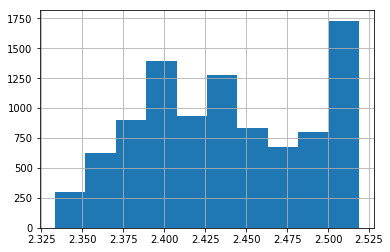

In [161]:
(all_data.Longitude**(1/4)).hist()

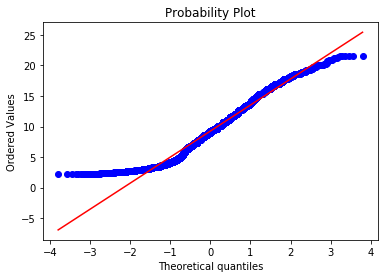

In [162]:
# and the Q-Q plot
stats.probplot((all_data.hm**(1/1.5)), dist="norm", plot=pylab)
pylab.show()

In [163]:
# let's add the transformed variables to the dataset
all_data['distance_transformed'] = all_data.distance**(1/4)
#all_data['lon_TRANSFORMED'] = all_data.Longitude**(1/1.5)


In [164]:
#all_data["Mean"] = all_data.mean(axis =1)

In [165]:
all_data.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,Q8_9,Q9,latitude2,longitude,mobile_money_classification,region,dist_grouped,hm,distance,distance_transformed
0,5086,-4.460442,29.811396,98,0,0,2,0,2,0,...,1,0,-4.57268,30.11092,0.0,Kigoma,Kasulu,98.0,35.481343,2.440619
1,1258,-6.176438,39.244871,40,0,0,1,4,1,5,...,0,1,-6.16875,39.20243,3.0,Zanzibar,Zanzibar,10.0,4.770566,1.477891
2,331,-6.825702,37.652798,18,0,0,2,0,2,0,...,1,0,-6.82282,37.67290,2.0,Morogoro,Morogoro Urban,18.0,2.243147,1.223811
3,6729,-3.372049,35.808307,50,0,0,1,2,2,0,...,0,0,-3.33868,35.67410,3.0,Arusha,Karatu,12.5,15.357533,1.979613
4,8671,-7.179645,31.039095,34,1,0,2,0,1,1,...,0,0,-7.50237,31.03970,3.0,Rukwa,Mpanda,34.0,35.896694,2.447731


In [166]:
#all_data.Mean.hist()

In [167]:
# # plot the histograms to have a quick look at the distributions
# # we can plot Q-Q plots to visualise if the variable is normally distributed

# def diagnostic_plots(df, variable):
#     # function to plot a histogram and a Q-Q plot
#     # side by side, for a certain variable
    
#     plt.figure(figsize=(15,6))
#     plt.subplot(1, 2, 1)
#     df[variable].hist()

#     plt.subplot(1, 2, 2)
#     stats.probplot(df[variable], dist="norm", plot=pylab)

#     plt.show()
    
# diagnostic_plots(all_data, 'Mean')

In [168]:
# all_data['mean_exp'] = all_data.Mean**(1/2) # you can vary the exponent as needed

# diagnostic_plots(all_data, 'mean_exp')

In [169]:


#created features corresponding to alternative coordinate systems
#x = xcos + ysin
#y = ycos - xsin
#all_data["rot45X"] = .707* all_data["Longitude"] + .707* all_data["Latitude"] 
#all_data["rot45Y"] = .707* all_data["Longitude"] - .707* all_data["Latitude"]

#all_data["rot30X"] = (1.732/2)* all_data["Latitude"] + (1./2)* all_data["Longitude"]
#all_data["rot30Y"] = (1.732/2)* all_data["Longitude"] - (1./2)* all_data["Latitude"]

#all_data["rot60X"] = (1./2)* all_data["Latitude"] + (1.732/2)* all_data["Longitude"] 
#all_data["rot60Y"] = (1./2)* all_data["Longitude"] - (1.732/2)* all_data["Latitude"]

#all_data["radial_r"] = np.sqrt( np.power(all_data["Longitude"],2) + np.power(all_data["Latitude"],2) )

In [170]:
#all_data['x'] = np.cos(all_data.Latitude) * np.cos(all_data.Longitude)
#all_data['y'] = np.cos(all_data.Latitude) * np.sin(all_data.Longitude) 
#all_data['z'] = np.sin(all_data.Latitude) 
#df['ATAN'] = np.arctan(df['SWD']/df['CWD'])


Text(0, 0.5, 'Frequency')

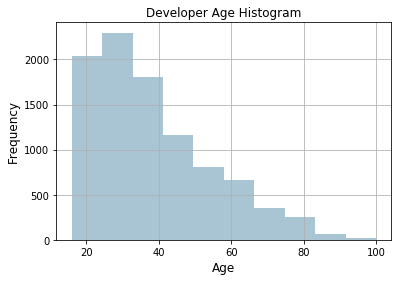

In [171]:



fig, ax = plt.subplots()  
all_data['Q1'].hist(color='#A9C5D3')  
ax.set_title('Developer Age Histogram', fontsize=12)   
ax.set_xlabel('Age', fontsize=12)  
ax.set_ylabel('Frequency', fontsize=12)


In [172]:
all_data['Age_bin_round'] = np.array(np.floor(np.array(all_data['Q1']) /10.))

In [173]:
#all_data['latlong'] = all_data.Longitude + all_data.Latitude

In [174]:
all_data['latlong'] = all_data.Longitude + all_data.Latitude

In [175]:
#Columns = [  'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
 #      'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
  #     'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', '', 'Q17', 'Q18', 'Q19']

In [176]:
#Columns = [ 'Q13',  'Q3']
Columns = [  'Q3']

In [177]:
all_data[Columns] = all_data[Columns].astype(str)

In [178]:
#all_data[Columns] = all_data[Columns].astype(float)

In [179]:
#[feat for feat in all_data.columns if all_data[feat].std() == 0 ]

In [180]:
all_data.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,latitude2,longitude,mobile_money_classification,region,dist_grouped,hm,distance,distance_transformed,Age_bin_round,latlong
0,5086,-4.460442,29.811396,98,0,0,2,0,2,0,...,-4.57268,30.11092,0.0,Kigoma,Kasulu,98.0,35.481343,2.440619,9.0,25.350954
1,1258,-6.176438,39.244871,40,0,0,1,4,1,5,...,-6.16875,39.20243,3.0,Zanzibar,Zanzibar,10.0,4.770566,1.477891,4.0,33.068433
2,331,-6.825702,37.652798,18,0,0,2,0,2,0,...,-6.82282,37.67290,2.0,Morogoro,Morogoro Urban,18.0,2.243147,1.223811,1.0,30.827096
3,6729,-3.372049,35.808307,50,0,0,1,2,2,0,...,-3.33868,35.67410,3.0,Arusha,Karatu,12.5,15.357533,1.979613,5.0,32.436258
4,8671,-7.179645,31.039095,34,1,0,2,0,1,1,...,-7.50237,31.03970,3.0,Rukwa,Mpanda,34.0,35.896694,2.447731,3.0,23.859450


In [181]:
all_data.groupby(['Q3'])['mobile_money_classification'].mean().sort_values()

Q3
3    1.324484
2    1.793304
1    1.847625
4    1.889077
Name: mobile_money_classification, dtype: float64

In [182]:
all_data.groupby(['Q3'])['mobile_money_classification'].mean().sort_values().index

Index(['3', '2', '1', '4'], dtype='object', name='Q3')

In [183]:
all_data.Q3.unique()

array(['3', '1', '4', '2'], dtype=object)

In [184]:
ordered_labels = all_data.groupby(['Q3'])['mobile_money_classification'].mean().sort_values().index

In [185]:
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
ordinal_label

{'3': 0, '2': 1, '1': 2, '4': 3}

In [186]:
all_data['Q3_ordered'] = all_data.Q3.map(ordinal_label)


In [187]:
# ordering the cat variables

In [188]:
all_data.groupby(['Q4'])['mobile_money_classification'].mean().sort_values()

Q4
1    1.058382
2    1.386233
5    1.867238
3    1.977655
4    2.294118
6    2.444915
8    2.500000
7    2.833333
Name: mobile_money_classification, dtype: float64

In [189]:
ordered_labels = all_data.groupby(['Q4'])['mobile_money_classification'].mean().sort_values().index
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
ordinal_label

{1: 0, 2: 1, 5: 2, 3: 3, 4: 4, 6: 5, 8: 6, 7: 7}

In [190]:
all_data['Q4_ordered'] = all_data.Q4.map(ordinal_label)


Text(0, 0.5, 'fin')

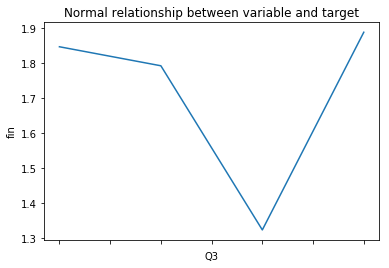

In [191]:
# let's inspect the newly created monotonic relationship with the target

#first we plot the original variable for comparison, there is no monotonic relationship

fig = plt.figure()
fig = all_data.groupby(['Q3'])['mobile_money_classification'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('fin')

In [192]:
# let's inspect the newly created monotonic relationship with the target

#first we plot the original variable for comparison, there is no monotonic relationship

#fig = plt.figure()
#fig = all_data.groupby(['Q3_ordered'])['mobile_money_classification'].mean().plot()
#fig.set_title('Normal relationship between variable and target')
#fig.set_ylabel('fin')

In [193]:
all_data.Q4.head()

0    1
1    3
2    6
3    3
4    1
Name: Q4, dtype: int64

In [194]:
all_data.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,mobile_money_classification,region,dist_grouped,hm,distance,distance_transformed,Age_bin_round,latlong,Q3_ordered,Q4_ordered
0,5086,-4.460442,29.811396,98,0,0,2,0,2,0,...,0.0,Kigoma,Kasulu,98.0,35.481343,2.440619,9.0,25.350954,0,0
1,1258,-6.176438,39.244871,40,0,0,1,4,1,5,...,3.0,Zanzibar,Zanzibar,10.0,4.770566,1.477891,4.0,33.068433,2,3
2,331,-6.825702,37.652798,18,0,0,2,0,2,0,...,2.0,Morogoro,Morogoro Urban,18.0,2.243147,1.223811,1.0,30.827096,3,5
3,6729,-3.372049,35.808307,50,0,0,1,2,2,0,...,3.0,Arusha,Karatu,12.5,15.357533,1.979613,5.0,32.436258,2,3
4,8671,-7.179645,31.039095,34,1,0,2,0,1,1,...,3.0,Rukwa,Mpanda,34.0,35.896694,2.447731,3.0,23.859450,2,0


In [195]:
all_data.drop(['distance','Q1','ID', 'Latitude',"Longitude",'latitude2','longitude'], axis = 1,inplace = True)
#all_data.drop(['ID', 'Latitude',"Longitude",'latitude2','longitude'], axis = 1,inplace = True)
#all_data.drop(['Q1','ID', 'Latitude','latitude2','longitude'], axis = 1,inplace = True)


In [196]:
#all_data.drop('hm',axis = 1,inplace =True)
all_data.drop(['Q4'], axis = 1,inplace = True)

In [197]:
all_data.columns

Index(['Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_10', 'Q8_11', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q9',
       'mobile_money_classification', 'region', 'dist_grouped', 'hm',
       'distance_transformed', 'Age_bin_round', 'latlong', 'Q3_ordered',
       'Q4_ordered'],
      dtype='object')

In [198]:
#all_data["std"] = all_data.std(axis=1)

In [199]:
#all_data["Mean"] = all_data.mean(axis =1)

In [200]:
#all_data.isnull().sum()
#all_data["sum"] = all_data.sum(axis  =1)

In [201]:
#from pygeocoder import Geocoder

In [202]:
all_data.head()

,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,...,Q9,mobile_money_classification,region,dist_grouped,hm,distance_transformed,Age_bin_round,latlong,Q3_ordered,Q4_ordered
0,0,0,2,0,2,0,1,0,4,4,...,0,0.0,Kigoma,Kasulu,98.0,2.440619,9.0,25.350954,0,0
1,0,0,1,4,1,5,4,4,1,4,...,1,3.0,Zanzibar,Zanzibar,10.0,1.477891,4.0,33.068433,2,3
2,0,0,2,0,2,0,1,0,1,1,...,0,2.0,Morogoro,Morogoro Urban,18.0,1.223811,1.0,30.827096,3,5
3,0,0,1,2,2,0,4,0,1,4,...,0,3.0,Arusha,Karatu,12.5,1.979613,5.0,32.436258,2,3
4,1,0,2,0,1,1,1,0,1,4,...,0,3.0,Rukwa,Mpanda,34.0,2.447731,3.0,23.859450,2,0


In [203]:
#all_data.drop('mean_exp',axis =1,inplace =True)

In [204]:
#import geocoder
all_data = pd.get_dummies(all_data)



In [205]:
# remove constant features
[feat for feat in all_data.columns if all_data[feat].std() == 0]


[]

In [206]:

#Get the new dataset
data = all_data[:ntrain]
test = all_data[ntrain:]

In [207]:
data.head()

,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,...,dist_grouped_Sumbawanga Urban,dist_grouped_Tabora Urban,dist_grouped_Tandahimba,dist_grouped_Tanga,dist_grouped_Tarime,dist_grouped_Temeke,dist_grouped_Ulanga,dist_grouped_Urambo,dist_grouped_Zanzibar,dist_grouped_rare
0,0,0,2,0,2,0,1,0,4,4,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,4,1,5,4,4,1,4,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2,0,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,2,2,0,4,0,1,4,...,0,0,0,0,0,0,0,0,0,0
4,1,0,2,0,1,1,1,0,1,4,...,0,0,0,0,0,0,0,0,0,0


In [208]:
test.head()

,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,...,dist_grouped_Sumbawanga Urban,dist_grouped_Tabora Urban,dist_grouped_Tandahimba,dist_grouped_Tanga,dist_grouped_Tarime,dist_grouped_Temeke,dist_grouped_Ulanga,dist_grouped_Urambo,dist_grouped_Zanzibar,dist_grouped_rare
7094,0,1,1,6,1,4,5,0,1,4,...,0,0,0,0,0,0,0,0,0,0
7095,1,0,2,0,1,4,1,0,1,4,...,0,0,0,0,0,0,0,0,0,0
7096,0,0,1,4,1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7097,1,0,2,0,2,0,1,0,1,4,...,0,0,0,0,1,0,0,0,0,0
7098,0,0,1,4,1,6,4,3,1,2,...,0,0,0,0,0,0,0,0,0,0


In [209]:
test.drop("mobile_money_classification",axis = 1,inplace = True)

C:\Users\OLALEYE ENIOLA\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [210]:
sample = pd.read_csv("sample_submission.csv")
sample.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.3,0.5,0.1,0.2
1,8208,0.3,0.5,0.1,0.2
2,2785,0.3,0.5,0.1,0.2
3,2967,0.3,0.5,0.1,0.2
4,1697,0.3,0.5,0.1,0.2


In [211]:
data.columns

Index(['Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       ...
       'dist_grouped_Sumbawanga Urban', 'dist_grouped_Tabora Urban',
       'dist_grouped_Tandahimba', 'dist_grouped_Tanga', 'dist_grouped_Tarime',
       'dist_grouped_Temeke', 'dist_grouped_Ulanga', 'dist_grouped_Urambo',
       'dist_grouped_Zanzibar', 'dist_grouped_rare'],
      dtype='object', length=164)

In [212]:
#d = {"s": [1,1,1,1,1,1,1,1,1,]}
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [213]:
#a = pd.DataFrame(d)
#a.s.std()

In [214]:
sample.head(1)

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.3,0.5,0.1,0.2


In [215]:

data.columns

Index(['Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       ...
       'dist_grouped_Sumbawanga Urban', 'dist_grouped_Tabora Urban',
       'dist_grouped_Tandahimba', 'dist_grouped_Tanga', 'dist_grouped_Tarime',
       'dist_grouped_Temeke', 'dist_grouped_Ulanga', 'dist_grouped_Urambo',
       'dist_grouped_Zanzibar', 'dist_grouped_rare'],
      dtype='object', length=164)

In [216]:

#data.to_csv('mytrain.csv',index = False)
#test.to_csv('mytest.csv',index = False)

In [217]:
#from skmultilearn.problem_transform import ClassifierChain


In [218]:
from sklearn.linear_model import LogisticRegression

In [219]:
from xgboost import XGBClassifier
#from tpot import TPOTClassifier

In [220]:
#data = pd.read_csv("training.csv")
#test = pd.read_csv("test.csv")
#data.drop(['mobile_money', 'savings', 'borrowing', 'insurance'], axis = 1,inplace = True)
#data.drop("ID", axis = 1,inplace =True)
#test.drop("ID", axis = 1,inplace =True)


In [221]:

X= data.drop( 'mobile_money_classification', axis = 1)
y = data["mobile_money_classification"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [222]:
y_train.head()

3849    3.0
307     1.0
1278    3.0
3142    1.0
4706    3.0
Name: mobile_money_classification, dtype: float64

In [223]:
data.shape

(7094, 164)

In [224]:
#model = BinaryRelevance(LogisticRegression())
from sklearn.tree import DecisionTreeClassifier 
#dtree_model = DecisionTreeClassifier(max_depth = 2)
#mod = XGBClassifier(n_estimators= 200, max_depth=5)
from lightgbm import LGBMClassifier
#model = XGBClassifier(n_estimators= 500,max_depth= 5, gamma=1)
#model = XGBClassifier(n_estimators= 200, max_depth=5)
#1.33680339327269
import xgboost as xgb

In [225]:
# from catboost import CatBoostClassifier
# params = {'depth':[3,1,2,6,4,5,7,8,9,10],
#           'iterations':[250,100,500,1000],
#           'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
#           'l2_leaf_reg':[3,1,5,10,100],
#           'border_count':[32,5,10,20,50,100,200],
#           'ctr_border_count':[50,5,10,20,100,200],
#           'thread_count':4}


In [226]:
# classifier = CatBoostClassifier(
# iterations = 100,
#     learning_rate= 0.2,
#               l2_leaf_reg= 5,

# loss_function='MultiClass',
# thread_count=8,
# )


In [227]:
# classifier = CatBoostClassifier(
        
# max_depth= 3,
#     learning_rate= 0.1,
# n_estimators=250,
# loss_function='MultiClass')


In [228]:
model = XGBClassifier(
          n_estimators= 250 )


In [229]:
#test[Columns] = test[Columns].astype(str)
from sklearn.metrics import log_loss

In [230]:
#
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [231]:
pred = model.predict_proba(X_test)
log_loss(y_test,pred)

0.7445745051170477

In [ ]:
#pred = model.predict_proba(X_test)
#log_loss(y_test,pred)

In [227]:
#0.7427861171554968
#0.7427861147425446


In [228]:
pred = model.predict_proba(X_test)
log_loss(y_test,pred)

0.7441397550060449

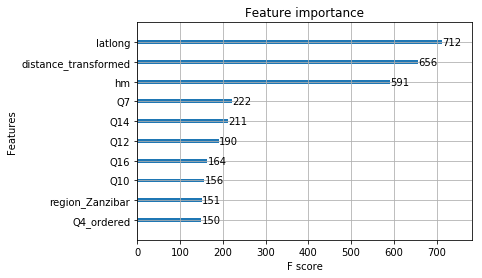

In [229]:
import matplotlib.pyplot as plt
xgb.plot_importance(model,max_num_features=10)
plt.rcParams['figure.figsize'] = [15, 5]

In [230]:
model.fit(data.drop(["mobile_money_classification"], axis =1), data["mobile_money_classification"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [231]:
#test = pd.get_dummies(test)

In [232]:
model.predict(test)

array([3., 3., 3., ..., 1., 1., 0.])

In [233]:
sample.columns

Index(['ID', 'no_financial_services', 'other_only', 'mm_only', 'mm_plus'], dtype='object')

In [234]:
model.predict_proba(test)

array([[6.2019378e-04, 2.4578664e-03, 1.7109424e-01, 8.2582766e-01],
       [2.2685802e-02, 4.9947169e-02, 1.5658104e-01, 7.7078599e-01],
       [5.0595193e-04, 5.3984271e-03, 1.0710772e-01, 8.8698786e-01],
       ...,
       [2.7798179e-01, 5.7616538e-01, 2.2866184e-02, 1.2298665e-01],
       [3.1462511e-01, 4.2194518e-01, 8.4449604e-02, 1.7898013e-01],
       [6.1447465e-01, 3.6246055e-01, 1.4206368e-02, 8.8584144e-03]],
      dtype=float32)

In [235]:
model.predict_proba(test)

array([[6.2019378e-04, 2.4578664e-03, 1.7109424e-01, 8.2582766e-01],
       [2.2685802e-02, 4.9947169e-02, 1.5658104e-01, 7.7078599e-01],
       [5.0595193e-04, 5.3984271e-03, 1.0710772e-01, 8.8698786e-01],
       ...,
       [2.7798179e-01, 5.7616538e-01, 2.2866184e-02, 1.2298665e-01],
       [3.1462511e-01, 4.2194518e-01, 8.4449604e-02, 1.7898013e-01],
       [6.1447465e-01, 3.6246055e-01, 1.4206368e-02, 8.8584144e-03]],
      dtype=float32)

In [236]:
pred = pd.DataFrame(model.predict_proba(test),columns= [ 'no_financial_services', 'other_only', 'mm_only', 'mm_plus'])

In [237]:
pred = pd.concat([sample["ID"], pred], axis =1)

In [238]:
#pred  =np.round(pred,3)
pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000620,0.002458,0.171094,0.825828
1,8208,0.022686,0.049947,0.156581,0.770786
2,2785,0.000506,0.005398,0.107108,0.886988
3,2967,0.353026,0.555228,0.015291,0.076455
4,1697,0.000119,0.001444,0.090927,0.907510


In [239]:
pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000620,0.002458,0.171094,0.825828
1,8208,0.022686,0.049947,0.156581,0.770786
2,2785,0.000506,0.005398,0.107108,0.886988
3,2967,0.353026,0.555228,0.015291,0.076455
4,1697,0.000119,0.001444,0.090927,0.907510


In [240]:
pred.to_csv("rarevalue1.csv", index = False)

In [352]:
from sklearn.neural_network import MLPClassifier

In [353]:
ml = MLPClassifier()

In [354]:
ml.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [ ]:
pred = m.predict_proba(X_test)
log_loss(y_test,pred)

In [342]:
from tpot import TPOTClassifier
tp = TPOTClassifier()

In [343]:
tp.fit(X_train,y_train)

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=100,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=100,
        random_state=None, scoring=None, subsample=1.0, use_dask=False,
        verbosity=0, warm_start=False)

In [345]:
pred = tp.predict_proba(X_test)
log_loss(y_test,pred)

0.8114636634202856

In [346]:
tp.predict_proba(test)

array([[2.77013473e-04, 2.60077844e-04, 2.89703502e-01, 7.09759407e-01],
       [5.14000743e-02, 1.51701372e-01, 1.60992348e-01, 6.35906206e-01],
       [5.05462225e-03, 1.23219108e-02, 1.86014877e-01, 7.96608590e-01],
       ...,
       [1.63112523e-01, 5.61880361e-01, 5.47784775e-02, 2.20228638e-01],
       [3.13169477e-01, 4.10674005e-01, 1.02654679e-01, 1.73501839e-01],
       [5.63375996e-01, 3.13851402e-01, 6.37273244e-02, 5.90452781e-02]])

In [348]:
pred = pd.DataFrame(tp.predict_proba(test),columns= [ 'no_financial_services', 'other_only', 'mm_only', 'mm_plus'])

In [349]:
pred = pd.concat([sample["ID"], pred], axis =1)

In [350]:
#pred.to_csv("lee1.csv", index = False).055
pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000277,0.000260,0.289704,0.709759
1,8208,0.051400,0.151701,0.160992,0.635906
2,2785,0.005055,0.012322,0.186015,0.796609
3,2967,0.385924,0.416714,0.069600,0.127762
4,1697,0.000231,0.000335,0.207640,0.791794


In [351]:
#pred.to_csv('tpot.csv',index = False)

In [368]:
pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000531,0.002930,0.174186,0.822353
1,8208,0.018649,0.041809,0.141993,0.797549
2,2785,0.000644,0.005596,0.099169,0.894591
3,2967,0.371044,0.563401,0.018079,0.047476
4,1697,0.000242,0.001635,0.109014,0.889110


In [231]:
pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000551,0.002591,0.163596,0.833262
1,8208,0.019157,0.043448,0.159505,0.777890
2,2785,0.000644,0.006204,0.100589,0.892563
3,2967,0.394459,0.547110,0.014608,0.043823
4,1697,0.000219,0.001188,0.099463,0.899131


In [204]:
pred

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000881,0.002235,0.098616,0.898267
1,8208,0.017272,0.048528,0.169924,0.764275
2,2785,0.001374,0.008014,0.116767,0.873845
3,2967,0.551190,0.380320,0.016913,0.051577
4,1697,0.001106,0.001920,0.106720,0.890255
5,4794,0.016891,0.064759,0.154984,0.763366
6,2675,0.027081,0.061783,0.167354,0.743782
7,2989,0.000585,0.001976,0.232294,0.765145
8,1634,0.393930,0.460690,0.073564,0.071817
9,4147,0.015903,0.069557,0.107325,0.807215


In [205]:
pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.001780,0.003859,0.173364,0.820997
1,8208,0.023208,0.052196,0.174839,0.749757
2,2785,0.002796,0.011820,0.086509,0.898875
3,2967,0.344809,0.563982,0.019978,0.071232
4,1697,0.001681,0.002970,0.092202,0.903147


In [2]:
import pandas as pd

In [952]:
a = pd.read_csv("notleastxgb.csv")
b= pd.read_csv('lordOfMercy1.csv')
#c = pd.read_csv('engine4.csv')

In [953]:
a.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000531,0.002930,0.174186,0.822353
1,8208,0.018649,0.041809,0.141993,0.797549
2,2785,0.000644,0.005596,0.099169,0.894591
3,2967,0.371044,0.563401,0.018079,0.047476
4,1697,0.000242,0.001635,0.109014,0.889110


In [219]:
#pd.read_csv("jago.csv")

In [954]:
pred = (0.3*a+0.7*b)

In [955]:
pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352.0,0.000597,0.002457,0.177988,0.818957
1,8208.0,0.020782,0.044579,0.150549,0.784090
2,2785.0,0.000560,0.005506,0.101921,0.892013
3,2967.0,0.373219,0.561084,0.017132,0.048566
4,1697.0,0.000166,0.001552,0.101391,0.896891


In [956]:
b.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000625,0.002255,0.179618,0.817502
1,8208,0.021697,0.045766,0.154215,0.778322
2,2785,0.000524,0.005467,0.103100,0.890908
3,2967,0.374151,0.560091,0.016726,0.049033
4,1697,0.000134,0.001516,0.098125,0.900225


In [957]:
pred.drop("ID", axis = 1, inplace = True)

In [958]:
pred = pd.concat([sample["ID"], pred], axis = 1)

In [959]:
pred.to_csv("amalar.csv",index = False)

In [960]:
pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000597,0.002457,0.177988,0.818957
1,8208,0.020782,0.044579,0.150549,0.784090
2,2785,0.000560,0.005506,0.101921,0.892013
3,2967,0.373219,0.561084,0.017132,0.048566
4,1697,0.000166,0.001552,0.101391,0.896891
